Taller Final MLP Classifier 

In [14]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

count    568630.000000
mean      12041.957635
std        6919.644449
min          50.010000
25%        6054.892500
50%       12030.150000
75%       18036.330000
max       24039.930000
Name: Amount, dtype: float64


c:\Users\sebas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


AUC-ROC: 0.9953685007799867
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     56750
           1       1.00      0.99      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
[[56557   193]
 [  334 56642]]


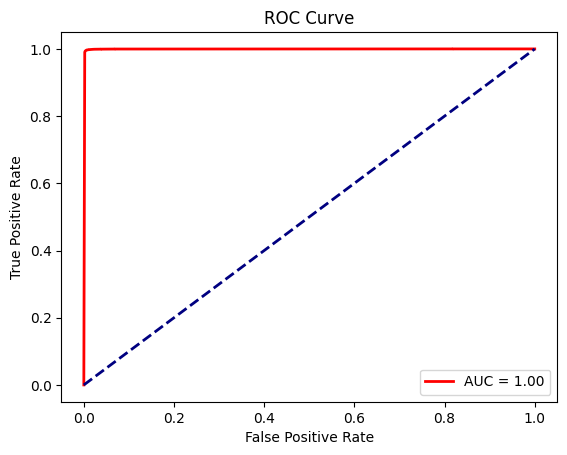

In [16]:
# Load and display the first few rows of the dataset
file_path = 'creditcard_2023.csv'  # assuming the file is in the current working directory
data = pd.read_csv(file_path)
# Although the V1-V28 features are already scaled, let's check the statistics of 'Amount'
print(data['Amount'].describe())

# Given that all other features are standardized, it makes sense to scale 'Amount' too
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

# Separating the 'Class' column (labels) from the rest of the dataset
X = data.drop(columns=['Class'])  # features
y = data['Class']  # labels

# Step 1: Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Step 2: Creating and configuring the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=50, random_state=42)  # You can adjust these parameters

# Fitting the model on the training data
mlp_classifier.fit(X_train, y_train)

# Step 4: Model Evaluation
# Predicting the test set results
y_pred = mlp_classifier.predict(X_test)

# Computing the AUC-ROC and other metrics on the test set
auc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC: {auc}")

# Additional detailed report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the ROC curve
y_pred_proba = mlp_classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


Accuracy: 0.9953660552556144
Precision: 0.996604205155274
Recall: 0.9941378826172423
F1 Score: 0.995369516127615
Confusion Matrix:
[[56557   193]
 [  334 56642]]


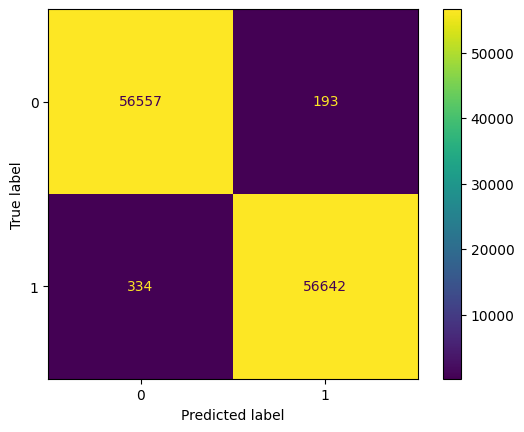

In [13]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall}')

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')

# Print the performance metrics.
print("Confusion Matrix:")
print(conf_matrix)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
plt.show()